# Decision Tree

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz  
import pydotplus

## Data

In [2]:
data = pd.read_csv('./results/main/main_simulation_data.csv')

In [3]:
data

,Type,Complexity,Granularity,Strategy,Proportion,Init_Performance,Final_Performance
0,Hard-to-easy,1,1,Best,10,0.192700,0.939500
1,Hard-to-easy,1,1,Conformity,10,0.192700,0.939500
2,Hard-to-easy,1,1,Random,10,0.192700,0.939500
3,Hard-to-easy,1,1,Best,10,0.223600,0.942400
4,Hard-to-easy,1,1,Conformity,10,0.223600,0.945000
...,...,...,...,...,...,...,...
75595,Easy-to-hard,14,10,Conformity,90,0.163208,0.552734
75596,Easy-to-hard,14,10,Random,90,0.163208,0.516113
75597,Easy-to-hard,14,10,Best,90,0.101624,0.626953
75598,Easy-to-hard,14,10,Conformity,90,0.101624,0.511230


In [4]:
data.rename(columns={'Proportion': 'SQB', 'Final_Performance': 'Performance'}, inplace=True)
data['Type'].replace({'Hard-to-easy': 0, 'Easy-to-hard': 1}, inplace=True)

In [5]:
strategy_dummy = pd.get_dummies(data['Strategy'])

In [6]:
data_pro = pd.concat([data, strategy_dummy], axis=1)
data_pro

,Type,Complexity,Granularity,Strategy,SQB,Init_Performance,Performance,Best,Conformity,Random
0,0,1,1,Best,10,0.192700,0.939500,1,0,0
1,0,1,1,Conformity,10,0.192700,0.939500,0,1,0
2,0,1,1,Random,10,0.192700,0.939500,0,0,1
3,0,1,1,Best,10,0.223600,0.942400,1,0,0
4,0,1,1,Conformity,10,0.223600,0.945000,0,1,0
...,...,...,...,...,...,...,...,...,...,...
75595,1,14,10,Conformity,90,0.163208,0.552734,0,1,0
75596,1,14,10,Random,90,0.163208,0.516113,0,0,1
75597,1,14,10,Best,90,0.101624,0.626953,1,0,0
75598,1,14,10,Conformity,90,0.101624,0.511230,0,1,0


In [7]:
data_pro.drop(['Strategy'], axis=1, inplace=True)
data_pro

,Type,Complexity,Granularity,SQB,Init_Performance,Performance,Best,Conformity,Random
0,0,1,1,10,0.192700,0.939500,1,0,0
1,0,1,1,10,0.192700,0.939500,0,1,0
2,0,1,1,10,0.192700,0.939500,0,0,1
3,0,1,1,10,0.223600,0.942400,1,0,0
4,0,1,1,10,0.223600,0.945000,0,1,0
...,...,...,...,...,...,...,...,...,...
75595,1,14,10,90,0.163208,0.552734,0,1,0
75596,1,14,10,90,0.163208,0.516113,0,0,1
75597,1,14,10,90,0.101624,0.626953,1,0,0
75598,1,14,10,90,0.101624,0.511230,0,1,0


In [8]:
X = data_pro[['Type', 'Complexity', 'Granularity', 'SQB', 'Best', 'Conformity', 'Random']]
y = data_pro['Performance']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, shuffle=True)

## CART

In [19]:
%%time

# CART model
cart_mes = []
cart_importance = []
for deep in range(1, 11):
    cart_clf = tree.DecisionTreeRegressor(max_depth=deep)
    cart_clf = cart_clf.fit(X_train, y_train)
    # train_score = clf.score(X, y)
    
    # train error
    y_train_pred = cart_clf.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    
    # test error
    y_test_pred = cart_clf.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mse_test = mean_squared_error(y_test, y_test_pred, squared=True)
    
    cart_mes.append(['CART', deep, mse_train, mse_test, rmse_train, rmse_test])
    feat_importance = ['CART', deep] + list(cart_clf.feature_importances_)
    cart_importance.append(feat_importance)

CPU times: total: 422 ms
Wall time: 420 ms


In [108]:
cart_mes_df = pd.DataFrame(cart_mes, columns=['Algorithm', 'Tree depth', 'Train MSE', 'Test MSE', 'Train rMSE', 'Test rMSE'])
# cart_mes_df

,Algorithm,Tree depth,Train MSE,Test MSE,Train rMSE,Test rMSE
0,CART,1,0.014006,0.013847,0.118345,0.117674
1,CART,2,0.011360,0.011195,0.106584,0.105806
2,CART,3,0.008031,0.008043,0.089613,0.089682
3,CART,4,0.006663,0.006754,0.081625,0.082185
4,CART,5,0.005894,0.005989,0.076775,0.077390
5,CART,6,0.005276,0.005417,0.072636,0.073603
6,CART,7,0.004873,0.005014,0.069805,0.070808
7,CART,8,0.004470,0.004606,0.066861,0.067868
8,CART,9,0.004059,0.004203,0.063707,0.064830
9,CART,10,0.003797,0.003979,0.061621,0.063079


In [109]:
# cart_mes_df.to_csv('./results/cart_rf/cart_mse10.csv', index=False)

In [41]:
def importance_transform(importance_list):
    new_result = []
    for sublist in importance_list:
        name = ['Task type', 'Task complexity', 'Task granularity', 'Group conservativeness']
        for i in range(4):
            new_list = [sublist[0], sublist[1], name[i], sublist[i+2]]
            new_result.append(new_list)
        new_result.append([sublist[0], sublist[1], 'Social learning strategy', sum(sublist[6:8])])
    return new_result

In [46]:
new_cart_importance = importance_transform(cart_importance)

In [47]:
new_cart_importance

[['CART', 1, 'Task type', 0.0],
 ['CART', 1, 'Task complexity', 0.0],
 ['CART', 1, 'Task granularity', 1.0],
 ['CART', 1, 'Group conservativeness', 0.0],
 ['CART', 1, 'Social learning strategy', 0.0],
 ['CART', 2, 'Task type', 0.24484573804958462],
 ['CART', 2, 'Task complexity', 0.0],
 ['CART', 2, 'Task granularity', 0.5827394258942599],
 ['CART', 2, 'Group conservativeness', 0.17241483605615548],
 ['CART', 2, 'Social learning strategy', 0.0],
 ['CART', 3, 'Task type', 0.202822542795708],
 ['CART', 3, 'Task complexity', 0.25027463006845097],
 ['CART', 3, 'Task granularity', 0.4106814936539527],
 ['CART', 3, 'Group conservativeness', 0.13622133348188842],
 ['CART', 3, 'Social learning strategy', 0.0],
 ['CART', 4, 'Task type', 0.17768681184550522],
 ['CART', 4, 'Task complexity', 0.24691427600567847],
 ['CART', 4, 'Task granularity', 0.3604742768804377],
 ['CART', 4, 'Group conservativeness', 0.21492463526837857],
 ['CART', 4, 'Social learning strategy', 0.0],
 ['CART', 5, 'Task type',

In [34]:
new_cart_importance_df = pd.DataFrame(new_cart_importance, columns=['Algorithm', 'Tree depth', 'Variable', 'Feature importance'])

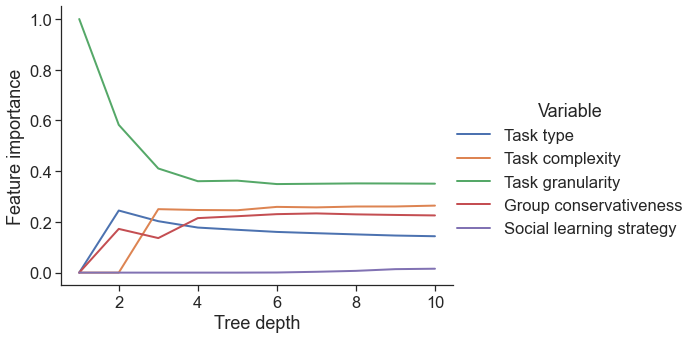

In [37]:
paras = {'font.size': 16, 'lines.linewidth': 2}
sns.set(context='notebook', style='ticks', font='Arial', font_scale=1.5, rc=paras)
# flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]

sns.relplot(x="Tree depth", y="Feature importance", hue="Variable", kind="line", data=new_cart_importance_df, aspect=1.4)

## Random Forest

In [79]:
%%time

# CART model
rf_mes = []
rf_importance = []
for deep in range(1, 11):
    rf_clf = RandomForestRegressor(max_depth=deep)
    rf_clf = rf_clf.fit(X_train, y_train)
    # train_score = clf.score(X, y)
    
    # train error
    y_train_pred = rf_clf.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    
    # test error
    y_test_pred = rf_clf.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mse_test = mean_squared_error(y_test, y_test_pred, squared=True)
    
    rf_mes.append(['Random Forest', deep, mse_train, mse_test, rmse_train, rmse_test])
    feat_importance = ['Random Forest', deep] + list(rf_clf.feature_importances_)
    rf_importance.append(feat_importance)

CPU times: total: 46 s
Wall time: 48.1 s


In [110]:
rf_mes_df = pd.DataFrame(rf_mes, columns=['Algorithm', 'Tree depth', 'Train MSE', 'Test MSE', 'Train rMSE', 'Test rMSE'])
rf_mes_df

,Algorithm,Tree depth,Train MSE,Test MSE,Train rMSE,Test rMSE
0,Random Forest,1,0.014006,0.013847,0.118345,0.117674
1,Random Forest,2,0.011255,0.011088,0.106089,0.105298
2,Random Forest,3,0.007981,0.007993,0.089337,0.089402
3,Random Forest,4,0.006565,0.006639,0.081024,0.081478
4,Random Forest,5,0.005704,0.005786,0.075526,0.076067
5,Random Forest,6,0.005106,0.005224,0.071453,0.072279
6,Random Forest,7,0.004681,0.004807,0.068421,0.069335
7,Random Forest,8,0.004194,0.004294,0.064762,0.065531
8,Random Forest,9,0.003834,0.003951,0.061923,0.062855
9,Random Forest,10,0.003592,0.003759,0.059930,0.061308


In [111]:
rf_mes_df.to_csv('./results/cart_rf/rf_mse10.csv', index=False)

In [80]:
new_rf_importance = importance_transform(rf_importance)

In [81]:
new_rf_importance

[['Random Forest', 1, 'Task type', 0.0],
 ['Random Forest', 1, 'Task complexity', 0.0],
 ['Random Forest', 1, 'Task granularity', 1.0],
 ['Random Forest', 1, 'Group conservativeness', 0.0],
 ['Random Forest', 1, 'Social learning strategy', 0.0],
 ['Random Forest', 2, 'Task type', 0.24591438703568302],
 ['Random Forest', 2, 'Task complexity', 0.0],
 ['Random Forest', 2, 'Task granularity', 0.581023892828485],
 ['Random Forest', 2, 'Group conservativeness', 0.1730617201358319],
 ['Random Forest', 2, 'Social learning strategy', 0.0],
 ['Random Forest', 3, 'Task type', 0.20398619829412493],
 ['Random Forest', 3, 'Task complexity', 0.2514177964926851],
 ['Random Forest', 3, 'Task granularity', 0.41213821979431053],
 ['Random Forest', 3, 'Group conservativeness', 0.1324577854188795],
 ['Random Forest', 3, 'Social learning strategy', 0.0],
 ['Random Forest', 4, 'Task type', 0.17784994190264442],
 ['Random Forest', 4, 'Task complexity', 0.24711747275732757],
 ['Random Forest', 4, 'Task granula

In [82]:
new_rf_importance_df = pd.DataFrame(new_rf_importance, columns=['Algorithm', 'Tree depth', 'Variable', 'Feature importance'])

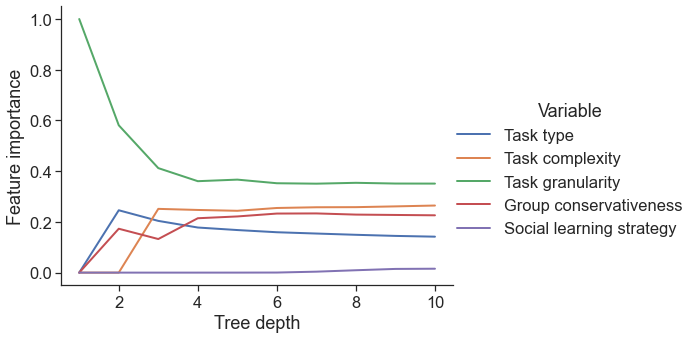

In [83]:
sns.relplot(x="Tree depth", y="Feature importance", hue="Variable", kind="line", data=new_rf_importance_df, aspect=1.4)

### RF Visualization

In [10]:
len(X_train)

60480

In [14]:
rf_clf = RandomForestRegressor(max_depth=3)
rf_clf = rf_clf.fit(X_train, y_train)

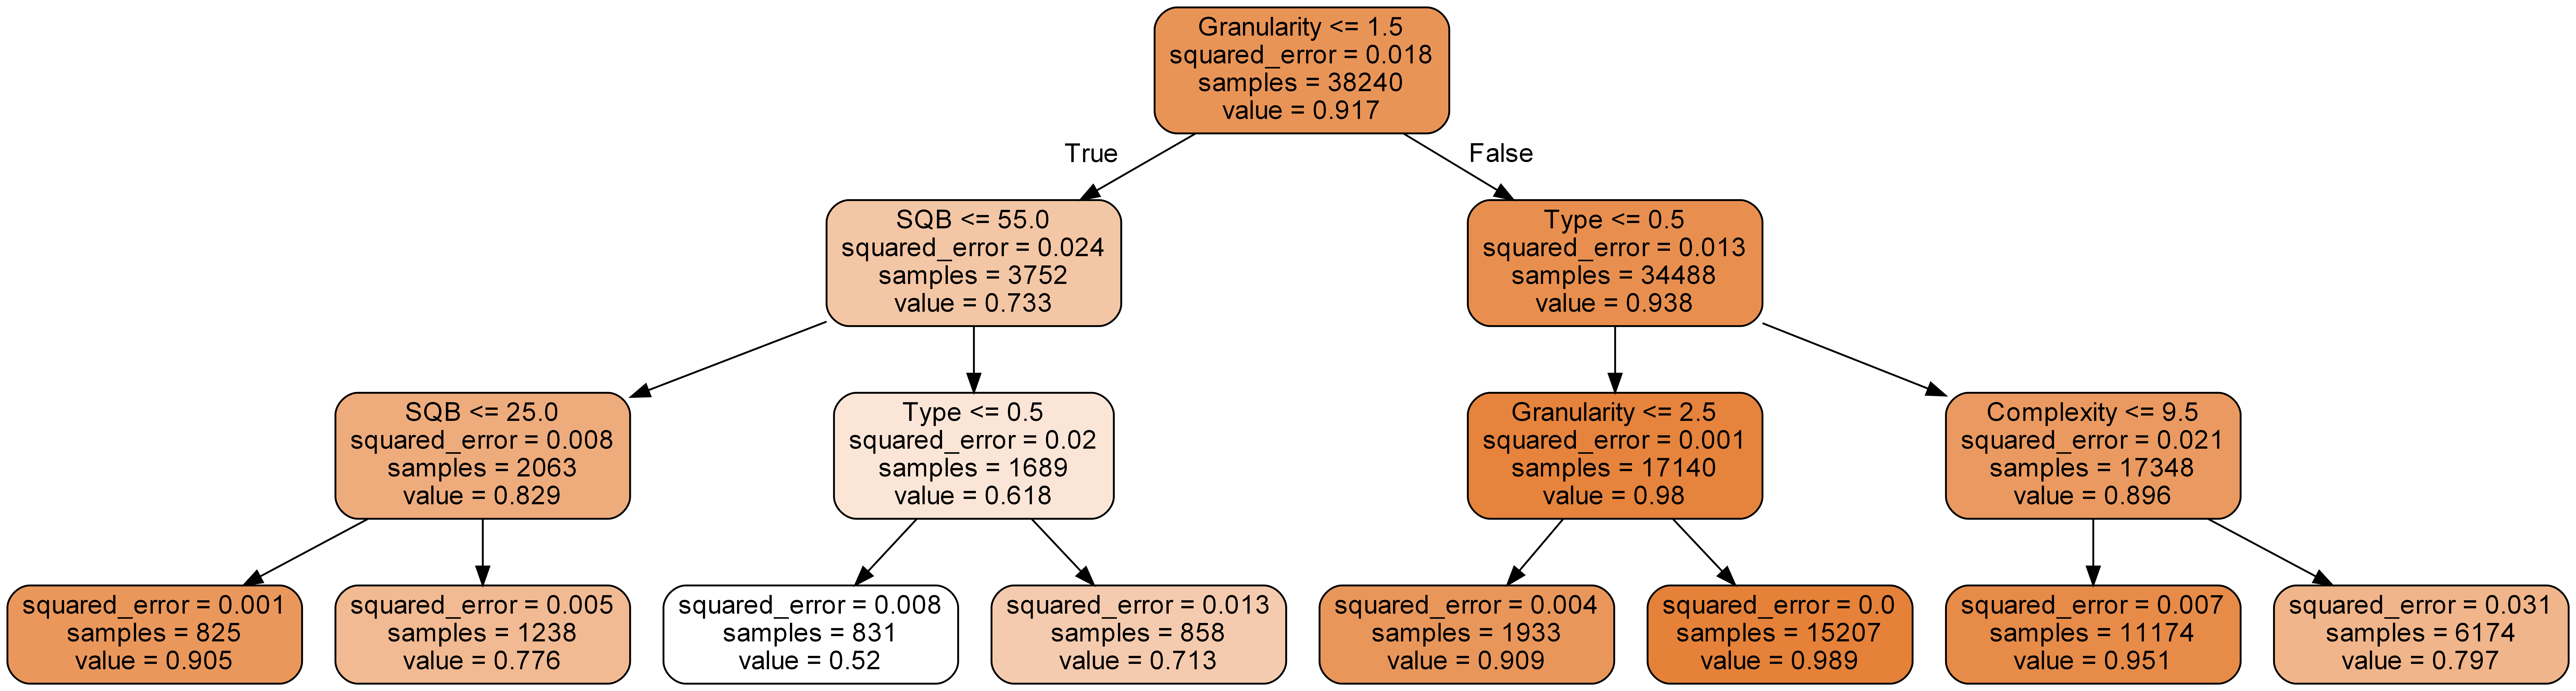

In [15]:
estimator = rf_clf.estimators_[1]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='rf_tree_01.dot', 
                feature_names = ['Type', 'Complexity', 'Granularity', 'SQB', 'Best', 'Conformity', 'Random'],
                rounded = True, proportion = False, 
                precision = 3, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'rf_tree_01.dot', '-o', 'rf_tree_01.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'rf_tree_01.png')

## CART vs RF

In [84]:
importance_all_df = pd.concat([new_cart_importance_df, new_rf_importance_df], axis=0)
importance_all_df

,Algorithm,Tree depth,Variable,Feature importance
0,CART,1,Task type,0.000000
1,CART,1,Task complexity,0.000000
2,CART,1,Task granularity,1.000000
3,CART,1,Group conservativeness,0.000000
4,CART,1,Social learning strategy,0.000000
...,...,...,...,...
45,Random Forest,10,Task type,0.141776
46,Random Forest,10,Task complexity,0.264546
47,Random Forest,10,Task granularity,0.351057
48,Random Forest,10,Group conservativeness,0.226033


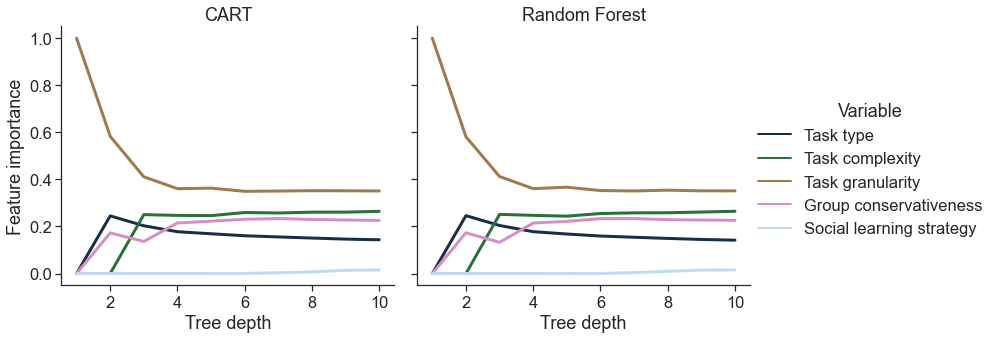

In [85]:
g = sns.relplot(x="Tree depth", y="Feature importance", hue="Variable", kind="line", col="Algorithm",
            data=importance_all_df, palette="cubehelix", aspect=1.1, height=5, linewidth=3)
# g.set_axis_labels("Task granularity", "Average performance")
g.set_titles("{col_name}")

photo = './figs/supp/cart_rf_feature_importance.svg'
plt.savefig(photo, dpi=360)
plt.show()

In [86]:
mes_res = []
for i in range(4):
    mes_res.append(cart_mes[i][2:6])
    mes_res.append(rf_mes[i][2:6])

In [88]:
mes_res_df = pd.DataFrame(mes_res, columns=['Train MSE', 'Test MSE', 'Train rMSE', 'Test rMSE'])
mes_res_df

,Train MSE,Test MSE,Train rMSE,Test rMSE
0,0.014006,0.013847,0.118345,0.117674
1,0.014006,0.013847,0.118345,0.117674
2,0.011360,0.011195,0.106584,0.105806
3,0.011255,0.011088,0.106089,0.105298
4,0.008031,0.008043,0.089613,0.089682
5,0.007981,0.007993,0.089337,0.089402
6,0.006663,0.006754,0.081625,0.082185
7,0.006565,0.006639,0.081024,0.081478


In [105]:
mes_res_df.to_csv('./results/cart_rf/cart_rf_mse4.csv', index=False)

In [103]:
cart_list = cart_importance[i][2:6]
cart_list.append(sum(cart_importance[i][6:8]))
cart_list

[0.17768681184550522,
 0.24691427600567847,
 0.3604742768804377,
 0.21492463526837857,
 0.0]

In [104]:
importance_res = []
for i in range(4):
    cart_list = cart_importance[i][2:6]
    cart_list.append(sum(cart_importance[i][6:8]))
    importance_res.append(cart_list)
    rf_list = rf_importance[i][2:6]
    rf_list.append(sum(rf_importance[i][6:8]))
    importance_res.append(rf_list)
    
importance_res_df = pd.DataFrame(importance_res, columns=['Task type', 'Task complexity', 'Task granularity', 'Group conservativeness', 'Social'])
importance_res_df

,Task type,Task complexity,Task granularity,Group conservativeness,Social
0,0.000000,0.000000,1.000000,0.000000,0.0
1,0.000000,0.000000,1.000000,0.000000,0.0
2,0.244846,0.000000,0.582739,0.172415,0.0
3,0.245914,0.000000,0.581024,0.173062,0.0
4,0.202823,0.250275,0.410681,0.136221,0.0
5,0.203986,0.251418,0.412138,0.132458,0.0
6,0.177687,0.246914,0.360474,0.214925,0.0
7,0.177850,0.247117,0.360582,0.214450,0.0


In [106]:
importance_res_df.to_csv('./results/cart_rf/cart_rf_importance4.csv', index=False)